In [68]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [69]:
# Try plotly

In [70]:
# Define tickers symbols
ticker_symbols = ['MSFT', 'TSLA', 'AAPL']#, 'AMZN', 'GOOG', 'AMC']
start_year = '2015-1-1'
end_year = '2020-1-1'

stocks_df = pd.DataFrame()

for t in ticker_symbols:
    
    t = yf.Ticker(t)
    ticker_df = t.history(period='1d', start=start_year, end=end_year)
    
    # Save the close columns of each stock into new variables
    t = ticker_df['Close']

    stocks_df = stocks_df.append(t)

stocks_df = stocks_df.T
stocks_df.columns = ticker_symbols

stocks_df.head(10)

,MSFT,TSLA,AAPL
2014-12-31,41.074078,44.481998,25.057606
2015-01-02,41.348206,43.862000,24.819241
2015-01-05,40.967976,42.018002,24.120045
2015-01-06,40.366688,42.256001,24.122320
2015-01-07,40.879539,42.189999,24.460564
2015-01-08,42.082142,42.124001,25.400398
2015-01-09,41.728439,41.332001,25.427635
2015-01-12,41.206730,40.442001,24.801083
2015-01-13,40.994503,40.849998,25.021282
2015-01-14,40.640797,38.537998,24.925943


In [71]:
def analyse_my_stock_portfolio2(stocks, weighting):

    print(f"This is your combined stock portfolio:\n {stocks}")
    
    #############################################################################################################################################
    ######################################################### Performance analysis ##############################################################
    #############################################################################################################################################

    #Calc daily returns
    daily_returns = stocks.pct_change().dropna()
    print()
    print(f"These are your daily returns:\n {daily_returns}")  
    print()  
    
    #Calc portfolio and cumulative returns
    #portfolio_return = combined_stock_df.dot(weighting[0:])
    portfolio_cum_return = (1+daily_returns).cumprod()  
                
   
    #Calc 21-day rolling std dev
    roll_std = daily_returns.rolling(window=21).std()

    #Calc correlation
    correlation = daily_returns.corr()
    print()
    print(f"This is your correlation matrix \n {correlation}")  
    print()      

    # Calculate Annualzied Sharpe Ratios
    sharpe_ratio = (daily_returns.mean()*252) / (daily_returns.std()*np.sqrt(252))
    print()
    print(f"This is your Sharpe Ratio:\n {sharpe_ratio}")  
    print()      

    #############################################################################################################################################
    ################################################################# PLOTS #####################################################################
    #############################################################################################################################################

    fig = plt.figure(figsize=(30, 20))    
    gs = GridSpec(3000, 5, figure=fig)
    ax1 = plt.subplot(gs[0:150, :])
    ax2 = plt.subplot(gs[300:700, :])
    ax3 = plt.subplot(gs[800:1000, :])                        
    ax4 = plt.subplot(gs[1200:1500, :])                        
    ax5 = plt.subplot(gs[1700:2000, :])                        
    ax6 = plt.subplot(gs[2100:2500, :])                        

    # Plot daily returns
    plot1 = daily_returns.plot(title='Daily returns', ax=ax1, figsize=(30,20))    
    plot1.set_xlabel("")

    #Plot box
    plot2 = sns.boxplot(data=daily_returns, ax=ax2).set_title('Daily returns')
    
    # Plot cumulative returns
    plot3 = portfolio_cum_return.plot(ax=ax3, title='Cumulative Returns')
    plot3.set_xlabel("")

    #Plot 21-day rolling std dev
    plot4 = roll_std.plot(figsize=(30, 20), title='Rolling 21-day standard deviation', ax=ax4)
    plot4.set_xlabel(" ")

    #Plot correlation
    mask = np.triu(np.ones_like(correlation, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)      
    sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap=cmap, ax=ax5, mask=mask)

    #Plot Sharpe Ratio
    sharpe_ratio = sharpe_ratio.plot(kind='bar', title='Sharpe ratios', edgecolor='red', color='black', ylabel='Sharpe ratio', xlabel='Portfolios', ax=ax6)
        
    fig.savefig('PerformanceAnalysis_Summary.png')

    plt.show()

This is your combined stock portfolio:
                   MSFT       TSLA       AAPL
2014-12-31   41.074078  44.481998  25.057606
2015-01-02   41.348206  43.862000  24.819241
2015-01-05   40.967976  42.018002  24.120045
2015-01-06   40.366688  42.256001  24.122320
2015-01-07   40.879539  42.189999  24.460564
...                ...        ...        ...
2019-12-23  155.044037  83.844002  70.167885
2019-12-24  155.014450  85.050003  70.234581
2019-12-26  156.285065  86.188004  71.628067
2019-12-27  156.570709  86.075996  71.600876
2019-12-30  155.221313  82.940002  72.025833

[1258 rows x 3 columns]

These are your daily returns:
                 MSFT      TSLA      AAPL
2015-01-02  0.006674 -0.013938 -0.009513
2015-01-05 -0.009196 -0.042041 -0.028172
2015-01-06 -0.014677  0.005664  0.000094
2015-01-07  0.012705 -0.001562  0.014022
2015-01-08  0.029418 -0.001564  0.038422
...              ...       ...       ...
2019-12-23  0.000000  0.033605  0.016318
2019-12-24 -0.000191  0.014384  0.0

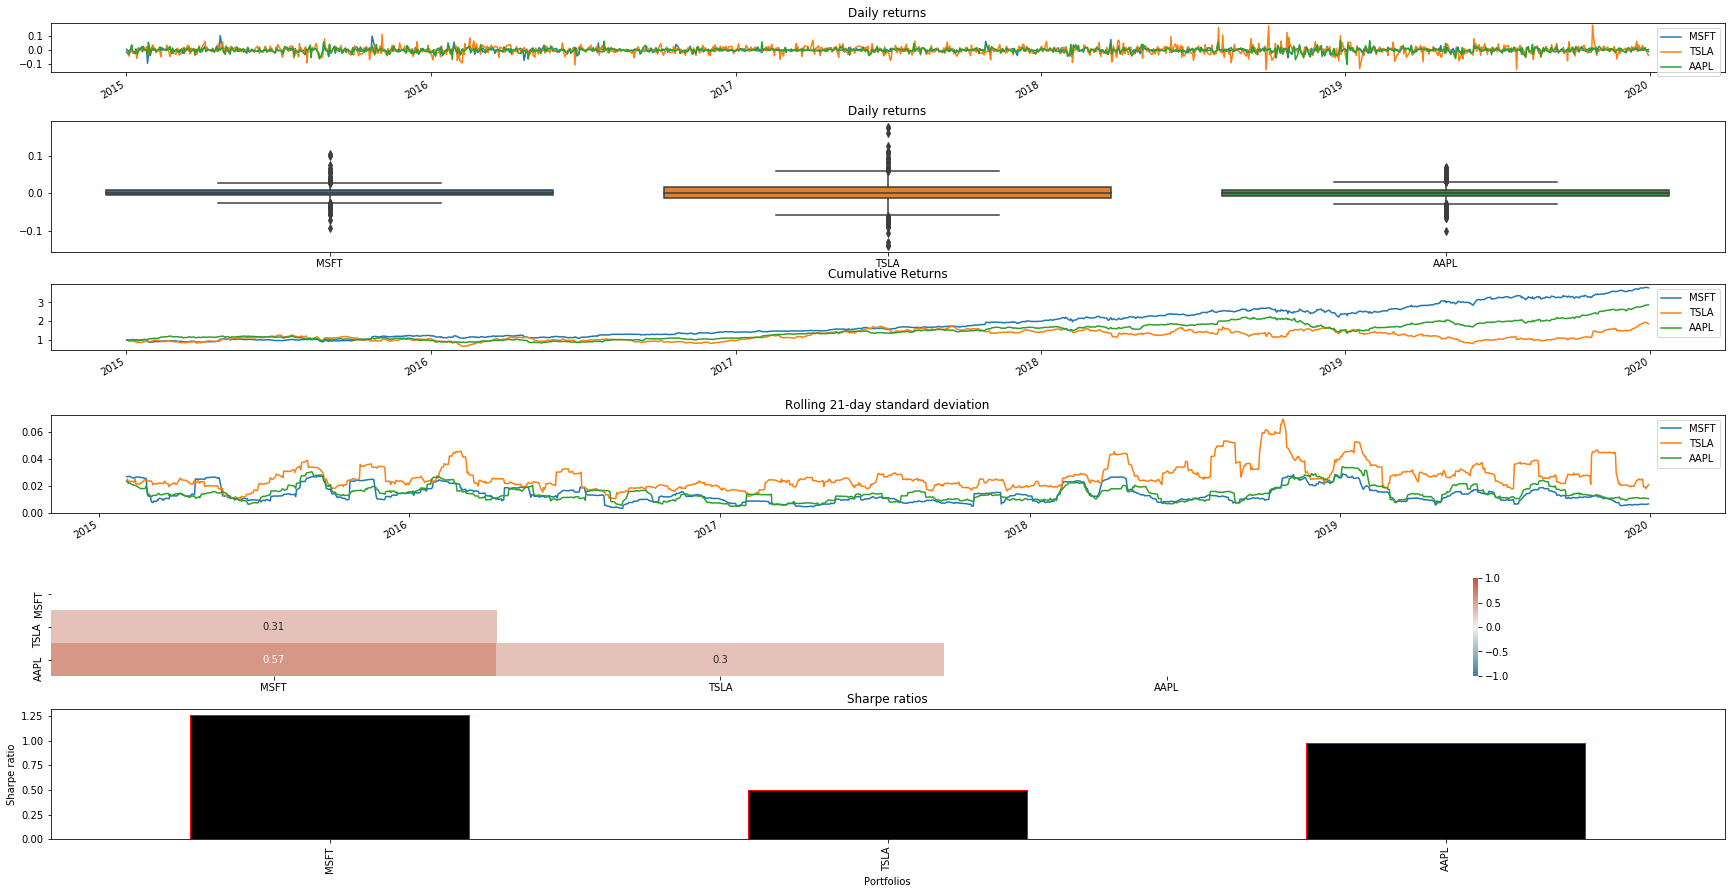

In [72]:
weight = [1/len(ticker_symbols)] * len(ticker_symbols)

analyse_my_stock_portfolio2(stocks_df, weight)

This is your combined stock portfolio:
 Empty DataFrame
Columns: []
Index: []

These are your daily returns:
 Empty DataFrame
Columns: []
Index: []


This is your correlation matrix 
 Empty DataFrame
Columns: []
Index: []


This is your Sharpe Ratio:
 Series([], dtype: float64)



TypeError: no numeric data to plot

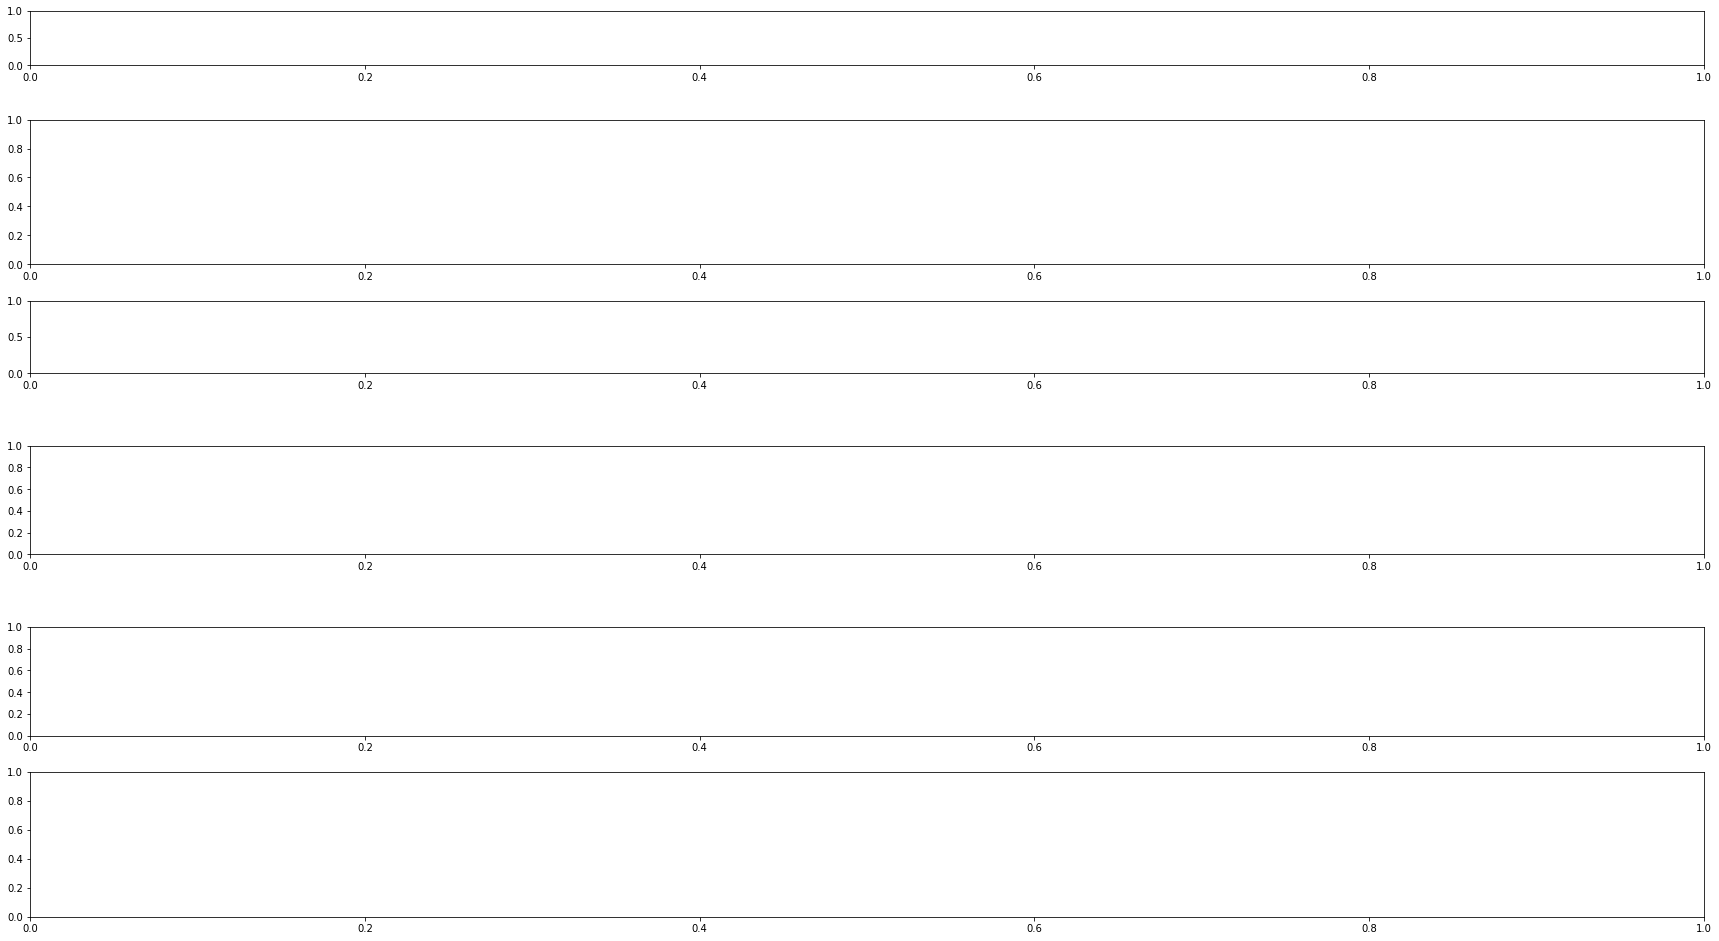

In [73]:
#stocks = [MSFT_close, TSLA_close, AAPL_close, AMZN_close, GOOG_close, AMC_close]
weight = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

analyse_my_stock_portfolio2(stocks, weight)